# Import libraries

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.cluster import KMeans

In [5]:
import warnings 
warnings.filterwarnings('ignore')

# Data Frame

In [6]:
df = pd.read_csv("/Users/otahina/Desktop/venv/Personal Project/Source_data.csv")

In [7]:
df.head()

,CustomerID,Name,Gender,Age,Annual Income (€),Spending Score (1-100)
0,1,Kyrie Ruiz,Male,19,15000,39
1,2,Roman Richardson,Male,21,15000,81
2,3,Tyson Lewis,Female,20,16000,6
3,4,Riley Butler,Female,23,16000,77
4,5,Angelina Gibson,Female,31,17000,40


# Univariate Analysis

In [8]:
df.describe()

,CustomerID,Age,Annual Income (€),Spending Score (1-100)
count,201.000000,201.000000,201.000000,201.000000
mean,101.000000,38.905473,60955.223881,50.398010
std,58.167861,13.956218,26791.472245,25.911403
min,1.000000,18.000000,15000.000000,1.000000
25%,51.000000,29.000000,42000.000000,35.000000
50%,101.000000,36.000000,62000.000000,50.000000
75%,151.000000,49.000000,78000.000000,73.000000
max,201.000000,70.000000,140000.000000,99.000000


<AxesSubplot: xlabel='Annual Income (€)', ylabel='Density'>

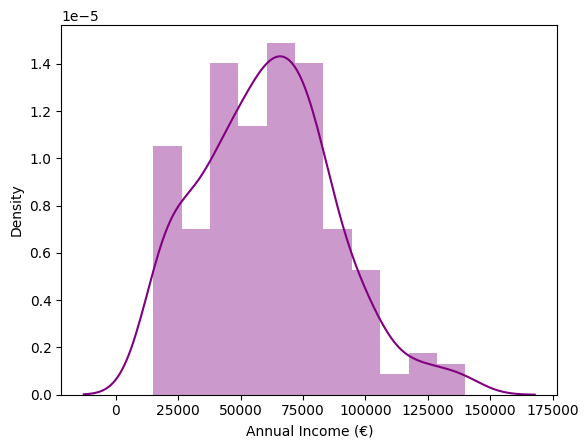

In [9]:
sns.distplot(df['Annual Income (€)'], color='purple')

In [10]:
df.columns

Index(['CustomerID', 'Name', 'Gender', 'Age', 'Annual Income (€)',
       'Spending Score (1-100)'],
      dtype='object')

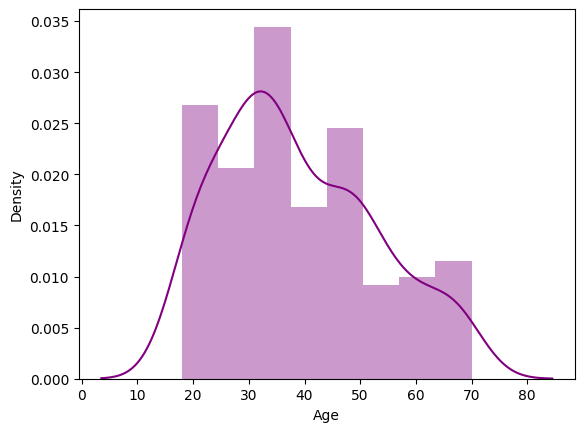

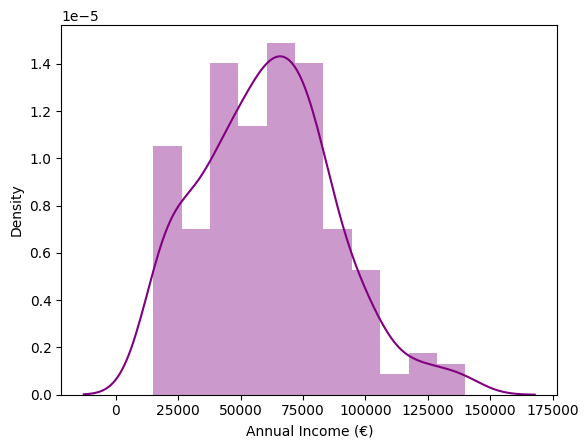

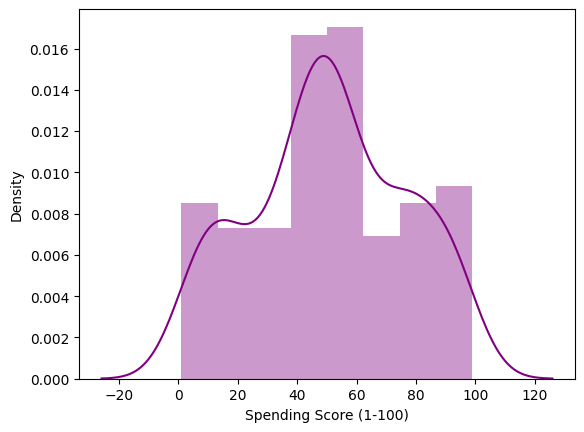

In [11]:
columns = ['Age', 'Annual Income (€)','Spending Score (1-100)']
for  i  in columns:
    plt.figure()
    sns.distplot(df[i], color='purple')

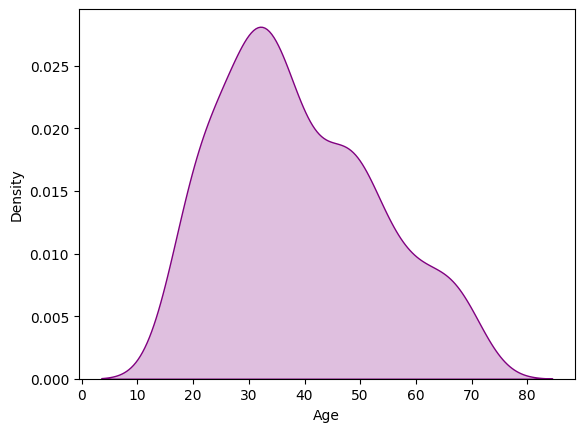

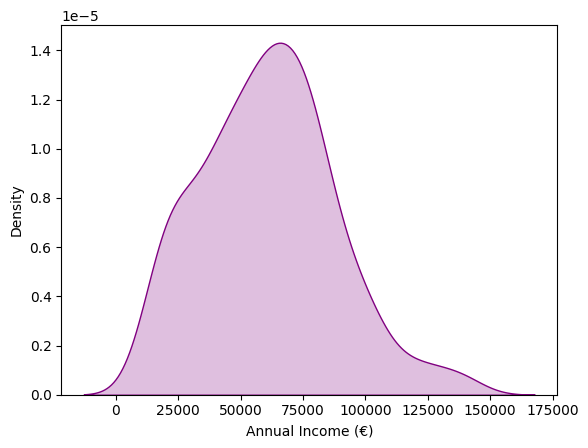

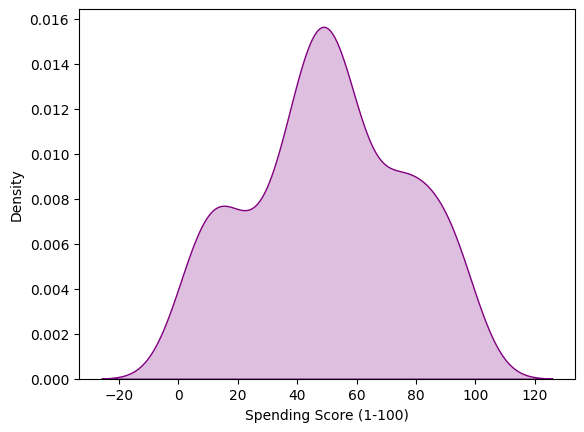

In [12]:
columns = ['Age', 'Annual Income (€)', 'Spending Score (1-100)']
for  i  in columns:
    plt.figure()
    sns.kdeplot(df[i], shade=True, color='purple')

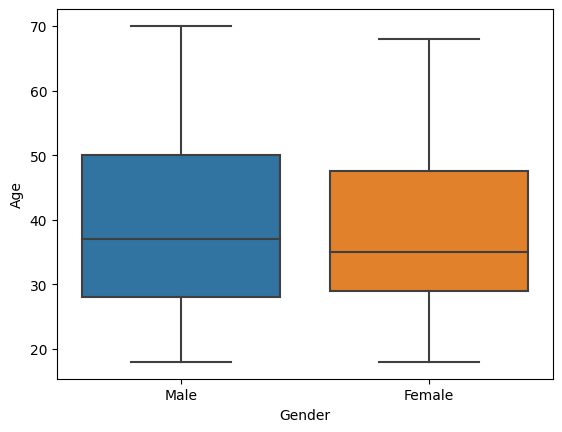

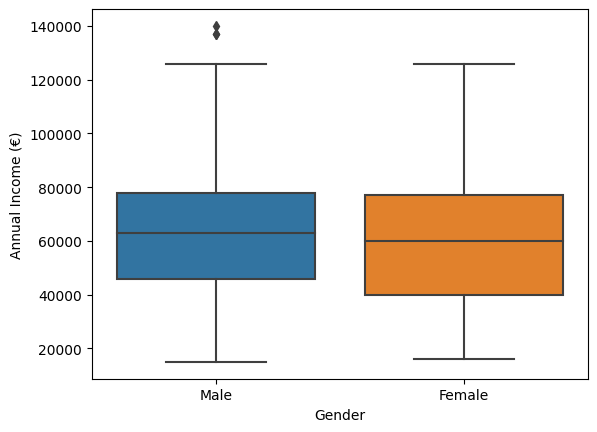

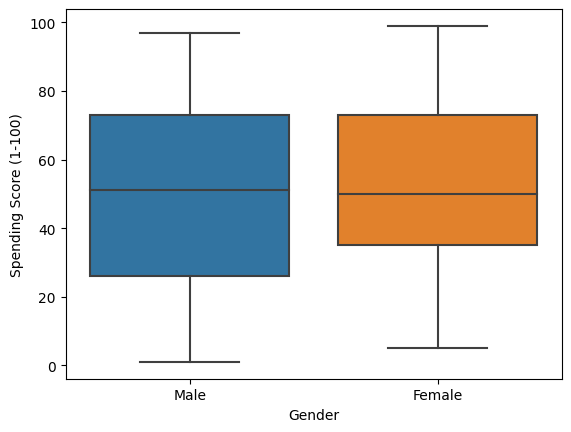

In [13]:
columns = ['Age', 'Annual Income (€)', 'Spending Score (1-100)']
for  i  in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])

In [14]:
df['Gender'].value_counts(normalize=True)

Female    0.557214
Male      0.442786
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot: xlabel='Annual Income (€)', ylabel='Spending Score (1-100)'>

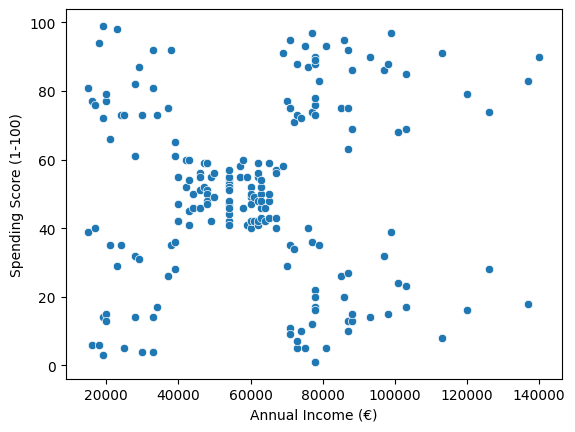

In [15]:
sns.scatterplot(data=df, x='Annual Income (€)', y= 'Spending Score (1-100)')

In [16]:
df=df.drop('CustomerID', axis=1) #Remove CustomerID from columns

In [17]:
df=df.drop('Name', axis=1) #Remove Name from columns

In [18]:
df.columns

Index(['Gender', 'Age', 'Annual Income (€)', 'Spending Score (1-100)'], dtype='object')

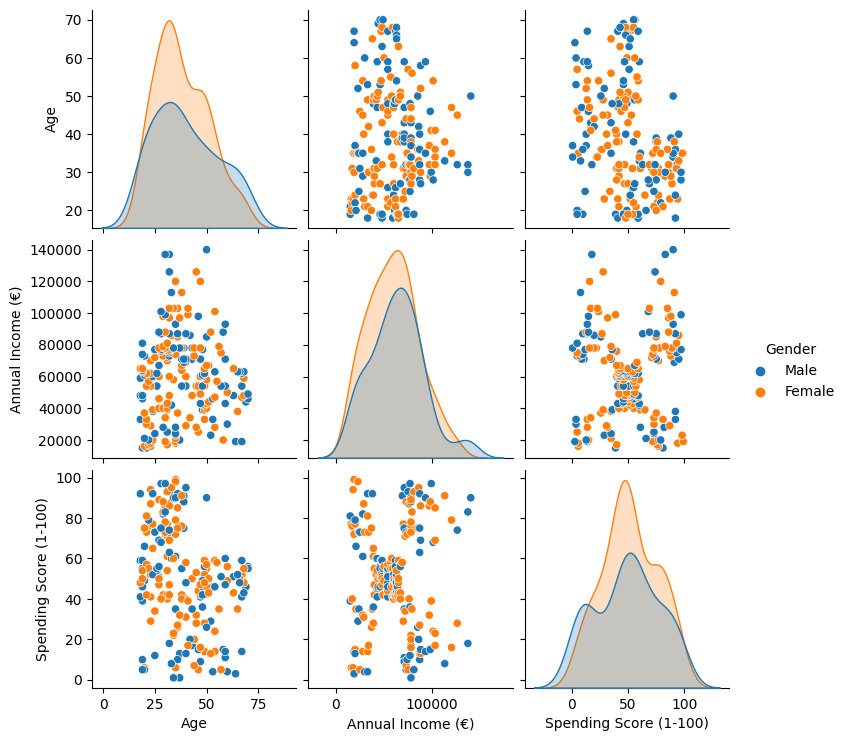

In [19]:
sns.pairplot(df,hue='Gender')

In [20]:
df.groupby(['Gender'])['Age', 'Annual Income (€)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (€),Spending Score (1-100)
Gender,,,
Female,38.098214,59250.000000,51.526786
Male,39.921348,63101.123596,48.977528


In [21]:
#Annual Income of male is higher than female.
#There is no big age difference.
#Females spend more than males. 

In [22]:
df.corr()

,Age,Annual Income (€),Spending Score (1-100)
Age,1.000000,-0.000319,-0.318679
Annual Income (€),-0.000319,1.000000,0.032286
Spending Score (1-100),-0.318679,0.032286,1.000000


<AxesSubplot: >

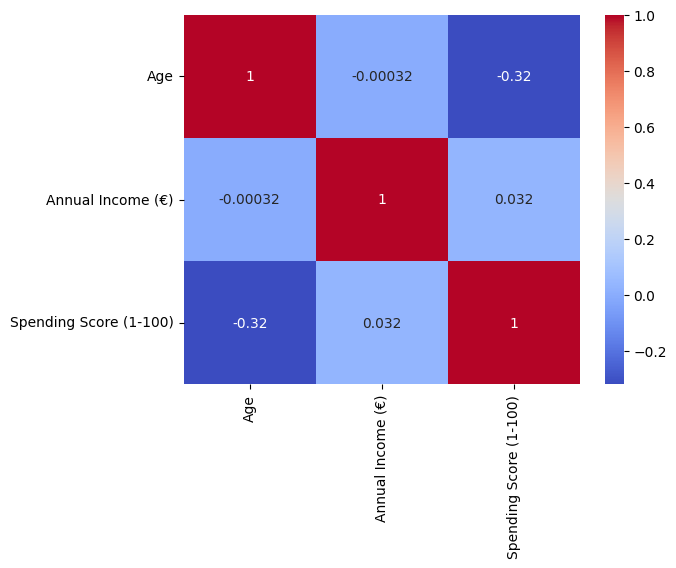

In [23]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Clustering

In [24]:
clustering1 = KMeans(n_clusters=3)

In [25]:
df.columns

Index(['Gender', 'Age', 'Annual Income (€)', 'Spending Score (1-100)'], dtype='object')

In [26]:
print(df)

     Gender  Age  Annual Income (€)  Spending Score (1-100)
0      Male   19              15000                      39
1      Male   21              15000                      81
2    Female   20              16000                       6
3    Female   23              16000                      77
4    Female   31              17000                      40
..      ...  ...                ...                     ...
196  Female   45             126000                      28
197    Male   32             126000                      74
198    Male   32             137000                      18
199    Male   30             137000                      83
200    Male   50             140000                      90

[201 rows x 4 columns]


In [27]:
clustering1.fit(df[['Annual Income (€)']])

KMeans(n_clusters=3)

In [28]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [29]:
#Create cluster according to income
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (€),Spending Score (1-100),Income Cluster
0,Male,19,15000,39,1
1,Male,21,15000,81,1
2,Female,20,16000,6,1
3,Female,23,16000,77,1
4,Female,31,17000,40,1


In [30]:
df['Income Cluster'].value_counts()

2    90
1    74
0    37
Name: Income Cluster, dtype: int64

In [31]:
clustering1.inertia_

25082748348.34835

In [32]:
inertia_scores=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (€)']])
    inertia_scores.append(kmeans.inertia_) 

In [33]:
inertia_scores

[143556597014.92538,
 52276182582.58258,
 25093569591.33046,
 14152484142.043917,
 8895235170.393066,
 5309040215.8228245,
 4079656565.6565657,
 2961676984.1269836,
 2426994932.8449326,
 1768954112.5541124]

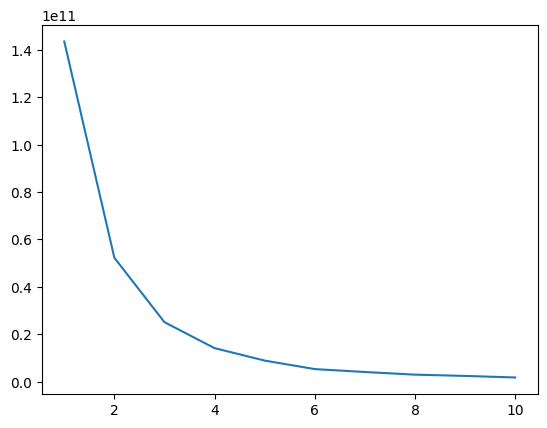

In [34]:
plt.plot(range(1, 11), inertia_scores)

In [35]:
df.columns

Index(['Gender', 'Age', 'Annual Income (€)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [36]:
#Show three clusters, and mean according to three values
df.groupby('Income Cluster')['Age', 'Annual Income (€)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (€),Spending Score (1-100)
Income Cluster,,,
0,38.162162,100972.972973,51.702703
1,39.500000,33486.486486,50.229730
2,38.722222,67088.888889,50.000000


# Bivariate Clustering

<AxesSubplot: xlabel='Annual Income (€)', ylabel='Spending Score (1-100)'>

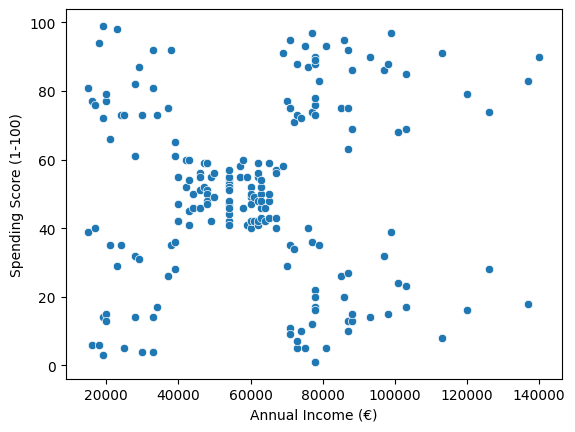

In [37]:
sns.scatterplot(x=df['Annual Income (€)'],
                y=df['Spending Score (1-100)'])

In [38]:
#There is a customer cluster which shows spending score is high, but annual income is low. 
#The target customer should be the cluster which shows spending score is high, and annual income is high. 

# Multivariate Clustering

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scale = StandardScaler()

In [41]:
df.head()

,Gender,Age,Annual Income (€),Spending Score (1-100),Income Cluster
0,Male,19,15000,39,1
1,Male,21,15000,81,1
2,Female,20,16000,6,1
3,Female,23,16000,77,1
4,Female,31,17000,40,1


In [42]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (€),Spending Score (1-100),Income Cluster,Gender_Male
0,19,15000,39,1,1
1,21,15000,81,1,1
2,20,16000,6,1,0
3,23,16000,77,1,0
4,31,17000,40,1,0


In [43]:
dff.columns

Index(['Age', 'Annual Income (€)', 'Spending Score (1-100)', 'Income Cluster',
       'Gender_Male'],
      dtype='object')

In [44]:
dff = dff[['Age', 'Annual Income (€)', 'Spending Score (1-100)', 'Gender_Male']]

In [45]:
dff.head()

,Age,Annual Income (€),Spending Score (1-100),Gender_Male
0,19,15000,39,1
1,21,15000,81,1
2,20,16000,6,0
3,23,16000,77,0
4,31,17000,40,0


In [46]:
dff = scale.fit_transform(dff)

In [47]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.429841,-1.719576,-0.440982,1.121796
1,-1.286178,-1.719576,1.183973,1.121796
2,-1.358010,-1.682157,-1.717733,-0.891427
3,-1.142515,-1.682157,1.029215,-0.891427
4,-0.567862,-1.644739,-0.402293,-0.891427


In [48]:
inertia_scores3=[]
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_) 

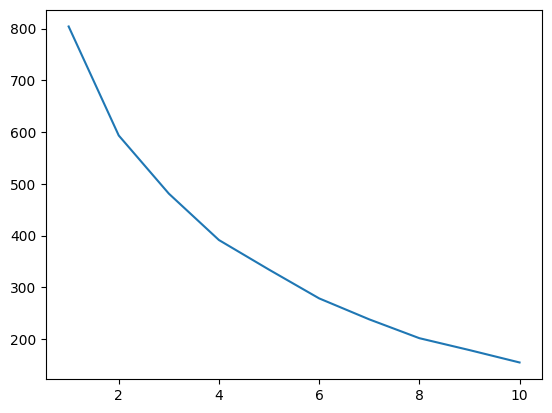

In [49]:
plt.plot(range(1, 11), inertia_scores3)